<a href="https://colab.research.google.com/github/Electromayonaise/Calculus-Notebooks/blob/main/M%C3%89TODO_DE_NEWTON_RAPHSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="300" height="200" align="center"> 

#**<big><big>Matemáticas Aplicadas I</big></big><br><small>Depto. Matemáticas & Estadística / Facultad de Ingeniería</small><br><small>Cuaderno Método de Newton y Descenso de Gradiente.**

1. **Lectura sugerida del texto de Lax. Calculus With Applications Approximation to Theory (2014)**: Sección 2.2c.

#Método de Newton
Prerrequisitos:
Encontrar el valor de la derivada en un punto. 

El problema:
Considere la tarea de encontrar las soluciones de la ecuación $f (x) = 0$. Si $f$ es un polinomio de primer grado como $f (x) = ax + b$, entonces la solución de $f (x) = 0$ viene dada por la fórmula $x = −b/a$.

Si $f$ es el polinomio de segundo grado $f (x) = ax^2 + bx + $, las soluciones de $f (x) = 0$ se pueden encontrar usando la fórmula cuadrática. Sin embargo, para polinomios de grado 3 o mayor, encontrar raíces de la ecuación $f(x)=0$ es un problema más complejo. Aunque existen fórmulas para polinomios de tercer y cuarto grado, son bastante complicadas. Además, si $f$ es un polinomio de grado 5 o mayor, se sabe que no existen tales fórmulas. Por ejemplo, considere la función

$$f(x)=x^2-4x$$

de la que sabemos que su derivada está dada por $$f'(x)=2x-4$$

el método de Newton permite calcular los ceros de la función haciendo uso de la derivada y se fundamenta en la siguiente idea:

Sea una función derivable, $f:[a,b] → \mathbb{R}$ de la cual sabemos que tiene una raíz en dicho intervalo y queremos encontrar un valor de $x_0 \in [a,b]$ que aproxime el valor de la raiz, es decir, un valor $x_0$ tal que $f(x_0)=0$. El proceso para encontrar el valor se describe en el siguiente proceso:

* Se elige $x_0$ en el eje de las $x$, asumiendo que está cerca de la solución de  $f(x_0)=0$ (raíz buscada).

* Se calcula la ecuación punto pendiente de la recta tangente a la función en $(x_0, f(x_0))$ haciendo uso de la función afin. $$f(x)=f(x_0)+f'(x_0)(x-x_0)--------- (1)$$

* Esta recta debe intersecar al eje de las $x$, en un punto $x_1$, más cercano a la raíz buscada.

* Así, el punto $(x_1, 0)$ satisface la ecuación $(1)$ y al sustituirlo se tiene que:$$f(x_1)=0+f'(x_0)(x_1-x_0)--------- (2)$$
 
* Si $f'(x_0) \neq 0$, entonces: $$x_1=x_0 - \frac{f(x_0)}{f'(x_0)}--------- (3) $$

* Se repite el proceso cuantas veces sea necesario y se obtiene la secuencia de números $x_1,x_1,x_2,...,x_n$.  

* Por tanto, la aproximación será mejor, entre más términos de esta sucesión calculemos.

# Método Númerico: Newton - Raphson

En las siguientes lineas de codigo se contruye el algoritmo trabajado anteriormente. 

Primero definimos la función $f(x)=x^{2}-4x$  y su derivada $f'(x)=2x-4$

In [ ]:
def f(x):return x**2-4*x
def df(x):return 2*x-4

Definimos nuestro valor de inicio como $x_0=3$ y calculamos la primera iteración:

In [ ]:
x0=3
x1=x0-f(x0)/df(x0)
x1

4.5

Ahora tomamos nuestro nuevo como e valor anterior, esto es $x_0=4.5$ y volvemos a iterar:

In [ ]:
x0=4.5
x1=x0-f(x0)/df(x0)
x1

4.05

Ahora tomamos nuestro nuevo como e valor anterior, esto es $x_0=4.05$ y volvemos a iterar:

In [ ]:
x0=4.05
x1=x0-f(x0)/df(x0)
x1

4.00060975609756

Ahora tomamos nuestro nuevo como e valor anterior, esto es $x_0=4.00060975609756$ y volvemos a iterar:

In [ ]:
x0=4.00060975609756
x1=x0-f(x0)/df(x0)
x1

4.000000092922295

Podemos ver que tenemos una mejor aproximación al cero $x=4$ de la función.

Método de Newton

In [ ]:
def Newton(f,df,x0,n):
  li=[x0]
  for _ in range(n):
    x=li[-1]
    li.append(x-f(x)/df(x))
  return li

In [ ]:
Newton(f,df,0.5,5)[-1]

-3.6350710512584224e-27

In [ ]:
def l(x,m,b):
  return m*x+b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def GNewton(f,df,x0,n):
  li=[x0]
  X=np.linspace(x0-10,x0+10)
  
  for _ in range(n):
    x=li[-1]
    b=f(x)-df(x)*x
    Y=l(X,df(x),b)
    plt.plot(X,f(X))
    plt.plot(X,Y)
    plt.hlines(0,x0-10,x0+10)
    plt.ylim(-10,10)
    li.append(x-f(x)/df(x))
  return li

[3, 4.5, 4.05, 4.00060975609756, 4.000000092922295, 4.000000000000003]

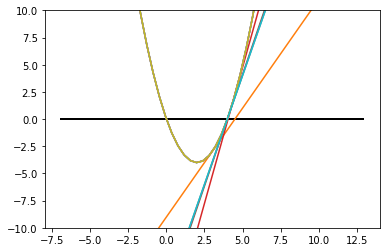

In [ ]:
GNewton(f,df,3,5)

Otra opción de código con tolerancia puede ser la siguiente:

In [ ]:
# Método de Newton-Raphson
# Ejemplo 1 (Burden ejemplo 1 p.51/pdf.61)

import numpy as np

# INGRESO
fx  = lambda x: x**(1/3)
dfx = lambda x: (1/3)*(x**(-2/3))

x0 = 0.5
tolera = 0.001

# PROCEDIMIENTO
tabla = []
Etramo = abs(2*tolera)
xi = x0
while (Etramo>=tolera):
    xnuevo = xi - fx(xi)/dfx(xi)
    Etramo  = abs(xnuevo-xi)
    tabla.append([xi,xnuevo,Etramo])
    xi = xnuevo

# convierte la lista a un arreglo.
tabla = np.array(tabla)
n = len(tabla)

# SALIDA
print(['xi', 'xnuevo', 'tramo'])
np.set_printoptions(precision = 4)
print(tabla)
print('raiz en: ', xi)
print('con error de: ',Etramo)

OverflowError: ignored

# Ejercicios

1. Comparar el método de bisección con el método de Newton.¿Qué hipótesis del método de bisección son relevantes en el algoritmo de Newton?.
2. Utilice el método de Newton para aproximar la solución de la ecuación $x^{3}=cosx$
3. Demuestre que el método de Newton aplicado a la ecuación $x^{3}-a=0$ conduce a la fórmula $x{_{(n+1)}}=\frac{1}{3}\left ( 2x{_{n}}+\frac{a}{{x_{n}}^2}\right )$, usada para aproximar la raíz cúbica de $a$. Utilice el método de Newton para aproximar el valor de $\sqrt[3]{7}$ con una presición de cinco decimales.
4. Utilice el método de Newton para hallar el cero de la función $f(x)=\frac{(x-1)^{2}}{x^{2}+1}$, con $x_0=-2$,$x_0=-1$ y con $x_0=0$. Para cada valor de $x_0$ consigne los valores de las iteraciones en una tabla y analice la convergencia de dichas iteraciones sucesivas. ¿Qué particularidades encuentra en cada caso?¿Qué puede concluir acerca del uso de éste método en el cálculo de ceros de funciones?
5. Suponga que deseamos encontrar la solución de la ecuación $x^{\frac{1}{3}}=0$. Muestre que la forma iterativa del método de Newton está dada por la expresión: $x_n=-2x_n$. Además, explique, gráficamente, la razón por la que el Método falla si iniciamos las iteraciones con $x_0=1$